# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yosua Nathanael Latuputty
- **Email:** ynathanael00@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1462

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu, kelembaban, dan kecepatan angin mempengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda dalam satu tahun? Apakah ada musim tertentu dengan jumlah penggunaan lebih banyak?
- Bagaimana tren penggunaan sepeda dalam satu hari? Pada jam berapa saja jumlah penggunaan lebih banyak?

## Import Semua Packages/Library yang Digunakan

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### Gathering Data
Pada tahap ini akan dilakukan *import* dataset yang akan digunakan dalam proses analisis data. Terdapat dua tabel yang digunakan, yaitu tabel day.csv, dan tabel hour.csv.

In [2]:
df_day = pd.read_csv('data\day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Tabel day.csv berisikan informasi mengenai penyewaan sepeda per-hari dalam jangka waktu dua tahun (2011 - 2012). Terdapat 16 fitur yang ada pada tabel ini, yaitu:
1. Instant: Indeks rekaman (record index).
2. dteday: Tanggal.
3. season: Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).
4. yr: Tahun (0: 2011, 1: 2012).
5. mnth: Bulan (1 hingga 12).
6. holiday: Apakah hari tersebut adalah hari libur atau bukan.
7. weekday: Hari dalam seminggu.
8. workingday: Apakah hari itu hari kerja:
    - 1: Hari kerja (bukan akhir pekan dan bukan hari libur).
    - 0: Akhir pekan atau hari libur.
9. weathersit: Kondisi cuaca:
    - 1: Cerah, sedikit berawan, berawan sebagian.
    - 2: Berkabut + Berawan, Berkabut + Awan pecah, Berkabut + Sedikit berawan, Berkabut.
    - 3: Salju ringan, Hujan ringan + Petir + Awan tersebar, Hujan ringan + Awan tersebar.
    - 4: Hujan deras + Hujan es + Petir + Kabut, Salju + Kabut.

10. temp: Suhu yang telah dinormalisasi dalam Celsius.
11. atemp: Suhu terasa (apparent temperature) yang telah dinormalisasi dalam Celsius.
12. hum: Kelembaban yang telah dinormalisasi.
13. windspeed: Kecepatan angin yang telah dinormalisasi. 
14. casual: Jumlah pengguna tidak terdaftar yang menyewa sepeda.
15. registered: Jumlah pengguna terdaftar yang menyewa sepeda.
16. cnt: Total jumlah penyewaan sepeda, termasuk pengguna tidak terdaftar dan terdaftar.

In [3]:
df_hour = pd.read_csv('data\hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Tabel hour.csv berisikan informasi yang sama dengan day.csv. Namun, tabel hour.csv menyediakan data yang lebih granular dimana informasi penyewaan sepeda disajikan per-jam dalam jangka waktu dua tahun (2011 - 2012) alih-alih per-hari seperti pada tabel day.csv. Karena itu, terdapat kolom tambahan *hour* yang menampilkan nilai 0 - 23 untuk merepresentasikan 24 jam dalam satu hari yang dimulai dari 0.

**Insight:**
- Kedua tabel merepresentasikan informasi mengenai peminjaman sepeda selama dua tahun (2011 - 2012) dilengkapi dengan fitur musim, bulan, hari libur, hari kerja, cuaca, suhu dan kelembapan, jenis peminjam, dan jumlah peminjam.
- Perbedaan kedua tabel terdapat pada granularitas waktu dimana tabel day.csv menyediakan informasi per-hari, sedangkan tabel hour.csv menyediakan informasi per-jam.

### Assessing Data
Pada tahap ini akan dicari tahu apa saja data yang harus dibersihkan pada kedua tabel.

#### Missing Value
Tabel *df_day* dan *df_hour* akan diperiksa menggunakan fungsi **isna()** untuk mengetahui jika terdapat nilai kosong atau *missing value* yang perlu ditangani.

In [56]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tabel df_day tidak didapati nilai kosong atau *missing value* sehingga tidak perlu dilakukan pengisian nilai ataupun dropping.

In [57]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada tabel df_hour juga tidak didapati adanya *missing value* sehingga tidak perlu dilakukan *data cleaning* untuk hal tersebut.

#### Duplicate Data
Pemeriksaan dilakukan terhadap kedua tabel jika terdapat nilai duplikasi yang perlu dihilangkan menggunakan fungsi **duplicated()**.

In [58]:
df_day.duplicated().sum()

np.int64(0)

Didapati bahwa dataset df_day tidak memiliki data duplikasi sehingga tidak diperlukan pembersihan data.

In [59]:
df_hour.duplicated().sum()

np.int64(0)

Didapati juga pada tabel df_hour bahwa tidak terdapat data duplikasi sehingga tidak diperlukan pembersihan data.

#### Data Type
Pada tahap ini akan dilakukan pemeriksaan terhadap tipe data menggunakan fungsi **info()** untuk masing-masing kolom pada kedua tabel.

In [60]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada tabel df_day, kolom *dteday* memiliki tipe data yang kurang sesuai yaitu *object*, dimana informasi yang disajikan adalah tanggal.

In [61]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama halnya dengan df_day, tabel kolom *dteday* pada tabel df_hour juga memiliki tipe data yang kurang sesuai untuk representasi tanggal, yaitu *object*. Kolom *dteday* pada kedua tabel tersebut dapat diubah menjadi tipe data *datetime* untuk pengolahan yang lebih mudah.

**Insight:**
- Tabel df_day dan df_hour tidak memiliki nilai kosong atau *missing value* sehingga tidak perlu ditangani.
- Kedua tabel juga tidak memiliki nilai duplikat.
- Terdapat sebuah kolom yang memiliki tipe data kurang sesuai, yaitu pada kolom *dteday* yang berisikan informasi tanggal. Kolom tersebut merupakan tipe data *object* sehingga harus diubah menjadi tipe data *datetime* untuk pengolahan yang lebih mudah.

### Cleaning Data
Pada tahap ini, akan diimplementasikan proses pembersihan data atau *Data Cleaning* berdasarkan kebutuhan yang telah diketahui pada tahap *Data Assessment*.

#### Change Data Type
Kolom dteday pada kedua tabel yang merupakan tipe data *object* akan diubah menjadi tipe data *datetime* menggunakan fungsi **to_datetime()** dari library *Pandas*.

In [64]:
df_day['dteday'] = pd.to_datetime(df_day['dteday']) 
df_hour['dteday'] = pd.to_datetime(df_hour['dteday']) 

In [65]:
df_hour['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


Tipe data kolom dteday pada tabel df_hour kini sudah berubah menjadi datetime.

In [66]:
df_day['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


Tipe data kolom dteday pada tabel df_day kini sudah berubah menjadi datetime.

**Insight:**
- Tipe data dteday pada kedua tabel telah diubah dari object menjadi datetime.

## Exploratory Data Analysis (EDA)
Pada tahap ini akan dilakukan eksplorasi data terhadap kedua tabel untuk mengekstraksi *insight* yang akan digunakan untuk menjawab pertanyaan-pertanyaan bisnis yang telah dirumuskan di awal.

### Explore Correlation (temp, hum, windspeed)

Korelasi Fitur temp (suhu), hum (kelembapan), dan windspeed (kecepatan angin) dengan fitur cnt (jumlah penyewaan) akan dihitung menggunakan fungsi **corr()** dari library *Pandas*. Fungsi ini akan menghasilkan sebuah nilai korelasi yang menunjukkan hubungan antar fitur tersebut. Nilai yang mendekati 1 atau -1 menunjukkan korelasi yang kuat, sedangkan nilai mendekati 0 menunjukkan korelasi yang lemah. Tes korelasi dilakukan pada tabel df_day.

#### Suhu

In [69]:
df_day[['cnt', 'temp']].corr()

,cnt,temp
cnt,1.000000,0.627494
temp,0.627494,1.000000


Hasil tes korelasi jumlah penyewaan sepeda dengan suhu menghasilkan nilai korelasi 0.6, yang menunjukkan adanya pola hubungan antara kedua variabel.

#### Kelembapan

In [72]:
df_day[['cnt', 'hum']].corr()

,cnt,hum
cnt,1.000000,-0.100659
hum,-0.100659,1.000000


Hasil tes korelasi jumlah penyewaan sepeda dengan kelembapan menghasilkan nilai korelasi -0.1, yang menunjukkan pola hubungan yang lemah antara kedua variabel.

#### Kecepatan Angin

In [73]:
df_day[['cnt', 'windspeed']].corr()

,cnt,windspeed
cnt,1.000000,-0.234545
windspeed,-0.234545,1.000000


Hasil tes korelasi jumlah penyewaan sepeda dengan kecepatan angin menghasilkan nilai korelasi -0.23, yang menunjukkan pola hubungan yang lemah antara kedua variabel.

### Monthly Trend

Tren bulanan akan dicari tahu dari tabel df_day dimana akan diketahui pada bulan apa saja jumlah penyewaan sepeda paling tinggi pada tahun 2011 dan 2012. Hal ini akan dilakukan menggunakan fungsi **groupby()** agar hanya menampilkan jumlah penyewaan sepeda, bulan, dan tahun. Nilai 1 merepresentasikan tahun 2011, sedangkan nilai 2 merepresentasikan tahun 2012.

In [ ]:
monthly_usage = df_day.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()
monthly_usage.loc[monthly_usage['yr'] == 0].sort_values(by=['cnt'], ascending=False)

,yr,mnth,cnt
5,0,6,4783.733333
6,0,7,4559.387097
7,0,8,4409.387097
4,0,5,4381.322581
8,0,9,4247.266667
9,0,10,3984.225806
10,0,11,3405.566667
3,0,4,3162.333333
11,0,12,2816.870968
2,0,3,2065.967742


Pada tahun 2011, angka penyewaan sepeda paling tinggi terdapat pada bulan 6, diikuti 7 dan 8, sedangkan angka terkecil ada pada bulan 1, diikuti 2 dan 3.

In [ ]:

monthly_usage.loc[monthly_usage['yr'] == 1].sort_values(by=['cnt'], ascending=False)

,yr,mnth,cnt
20,1,9,7285.766667
19,1,8,6919.451613
17,1,6,6761.000000
18,1,7,6567.967742
21,1,10,6414.225806
16,1,5,6318.225806
15,1,4,5807.466667
14,1,3,5318.548387
22,1,11,5088.800000
23,1,12,3990.741935


Pada tahun 2012, terjadi peningkatan jumlah penyewaan sepeda untuk setiap bulan dibandingkan dengan tahun 2011. Jumlah penyewaan sepeda paling tinggi terdapat pada bulan 9, diikuti dengan bulan 8 dan 6, sedangkan jumlah terkecil pada bulan 1, diikuti dengan 2 dan 12.

### Hourly Trend

Tren per jam akan dicari tahu dari tabel df_hour dimana akan diketahui pada jam apa saja jumlah penyewaan sepeda paling tinggi dalam satu hari. Hal ini akan dilakukan menggunakan fungsi **groupby()** agar hanya menampilkan jumlah penyewaan sepeda dan jam.

In [ ]:
hourly_usage = df_hour.groupby('hr')['cnt'].mean().reset_index()
hourly_usage.sort_values(by='cnt', ascending=False)

,hr,cnt
17,17,461.452055
18,18,425.510989
8,8,359.011004
16,16,311.983562
19,19,311.523352
13,13,253.661180
12,12,253.315934
15,15,251.233196
14,14,240.949246
20,20,226.030220


Hasil penghitungan tren harian menunjukkan adanya jam-jam tertentu dimana jumlah penyewaan sepeda paling tinggi ataupun paling rendah. Pukul 17.00 berada di posisi paling atas dengan jumlah penyewaan paling banyak, sedangkan pukul 04.00 berada paling bawah dengan jumlah penyewaan paling sedikit.

**Insight:**

- Tes korelasi antara jumlah penyewaan sepeda dengan suhu, kelembapan, dan kecepatan angin menunjukkan bahwa suhu memiliki hubungan paling kuat dengan jumlah penyewaan sepeda setiap harinya.

- Tren bulanan dapat dilihat dari hasil penghitungan dimana awal bulan dan akhir bulan memiliki jumlah penyewaan paling sedikit, sedangkan paling tinggi pada pertengahan tahun. Selain itu, terjadi jumlah peningkatan jumlah penyewaan pada tahun 2012 dibandingkan tahun 2011

- Tren harian dapat dilihat dari hasil penghitungan dimana pukul 17.00 menunjukkan waktu penyewaan sepeda paling banyak, diikuti dengan 18.00 dan 08.00, sedangkan pukul 04.00 adalah waktu penyewaan sepeda paling sedikit. 

## Visualization & Explanatory Analysis

### Pertanyaan 1:

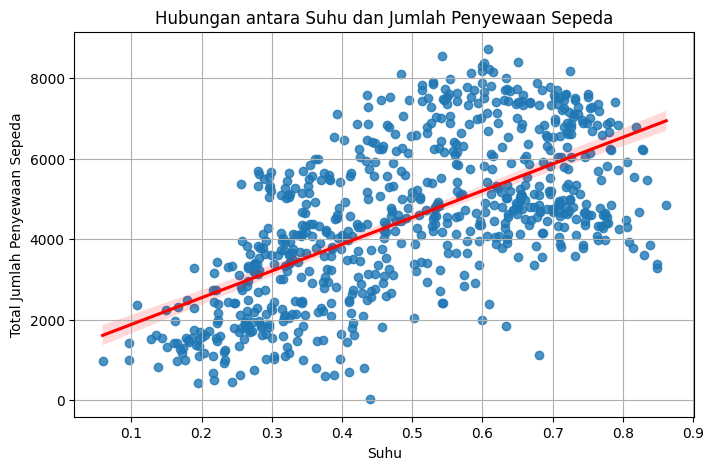

In [111]:
plt.figure(figsize=(8,5))
sns.regplot(data=df_day, x='temp', y='cnt', line_kws={'color':'red'})

plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Total Jumlah Penyewaan Sepeda")
plt.grid()
plt.show()

Tes korelasi menunjukkan bahwa suhu memiliki korelasi yang cukup kuat dengan jumlah penyewaan sepeda per-harinya. Hal ini menunjukkan bahwa semakin hangat suhu pada suatu hari, maka ada kecenderungan bahwa akan lebih banyak orang yang menyewa sepeda pada hari itu.

### Pertanyaan 2:

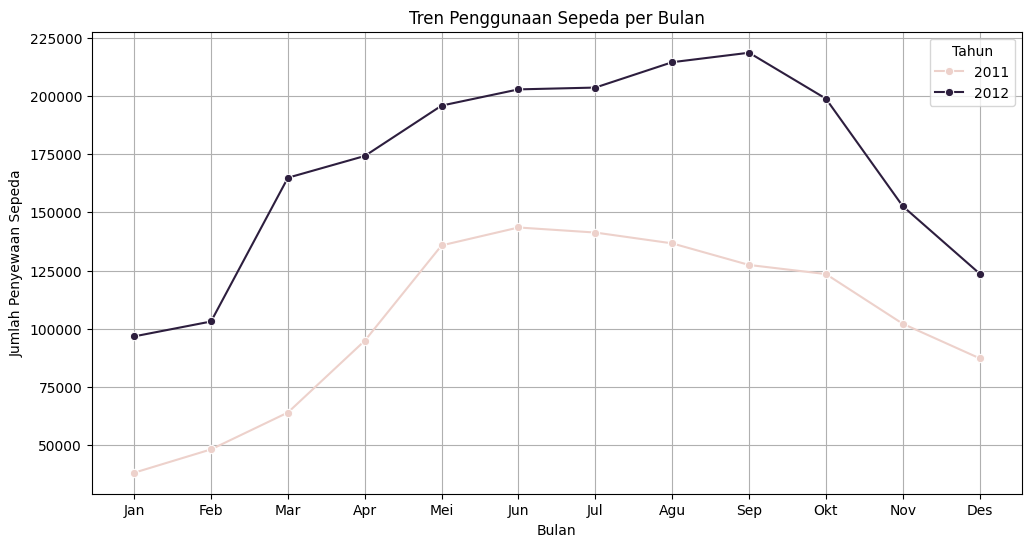

In [82]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_usage, x='month', y='cnt', hue='year', marker="o")

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.title("Tren Penggunaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend(title="Tahun")
plt.grid()
plt.show()

Visualisasi data penyewaan sepeda per jam menunjukkan adanya pola dimana:
- Penyewaan sepeda lebih rendah di bulan Januari dan Desember.
- Penyewaan meningkat mulai Maret, mencapai puncaknya antara Mei hingga September, kemudian turun lagi menjelang akhir tahun.
- Pada tahun 2012, jumlah penyewaan sepeda meningkat dibandingkan tahun 2011 di setiap bulan.

### Pertanyaan 3:

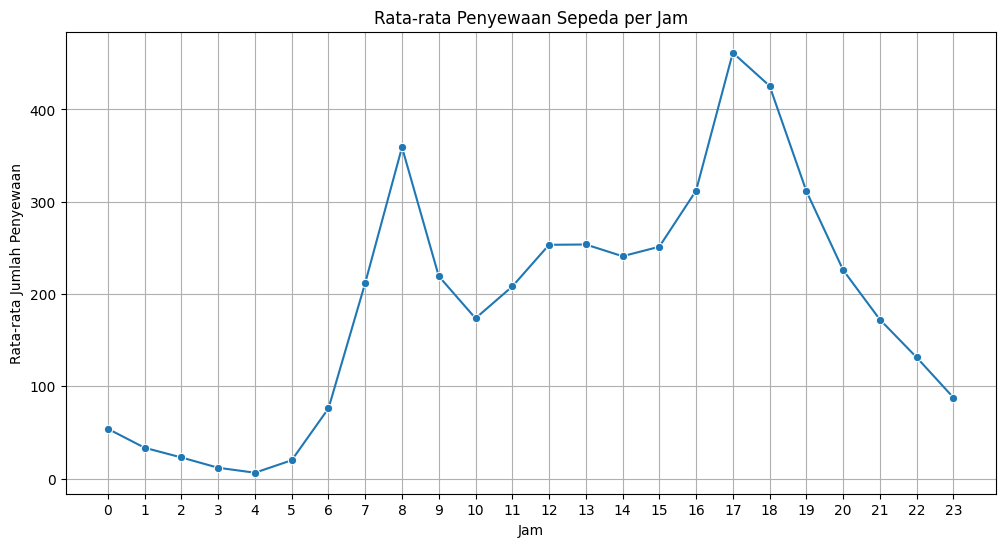

In [118]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_usage, x='hr', y='cnt', marker="o")
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.grid()
plt.show()

Visualisasi tren per jam menunjukkan adanya pola dimana:
- Penyewaan sangat rendah antara jam 00:00 - 05:00, dengan titik terendah sekitar jam 04:00 dengan 6.35 penyewaan.
- Terjadi peningkatan pada pukul 06.00 - 09.00, dengan lonjakan signifikan pada 08.00 - 09.00.
- Pada pukul 10.00 - 16.00 jumlah penyewaan relatif stabil dengan sedikit peningkatan.
- Terjadi peningkatan signifikan kedua pada 17.00 - 18.00, dengan titik tertinggi pada jam 18.00 dengan 461.45 penyewaan.
- Setelah pukul 19.00 penyewaan mulai turun drastis hingga mencapai titik terendah pada 23.00 dengan 87.83 penyewaan.

**Insight:**
- Korelasi antara suhu dengan jumlah penyewaan sepeda menunjukkan bahwa semakin hangat suhu pada suatu hari, maka ada kecenderungan bahwa akan lebih banyak orang yang menyewa sepeda pada hari itu.

- Dapat disimpulkan adanya tren peningkatan penggunaan sepeda dari tahun 2011 ke 2012, serta pola musiman di mana jumlah penyewaan lebih tinggi pada musim panas dan gugur, dan lebih rendah pada musim dingin dan semi. 

- Dapat disimpulkan adanya tren per jam dimana:
    - Dua puncak utama penyewaan sepeda terjadi pada jam 08:00 (berangkat kerja/sekolah) dan 17:00 - 18:00 (pulang kerja/sekolah).
    - Malam hingga dini hari memiliki penyewaan yang rendah, kemungkinan karena kurangnya aktivitas.
    - Jumlah penyewaan antara 10:00 - 16:00 relatif stabil, kemungkinan digunakan untuk aktivitas seperti rekreasi atau keperluan bisnis.

## Analisis Lanjutan (Opsional)

### Binning

Pada tahap ini akan dilakukan binning untuk mengelompokan jumlah penyewaan sepeda berdasarkan musim dalam satu tahun.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15888\3548497296.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_trend, x=labels_mnth, y='cnt', palette='coolwarm')


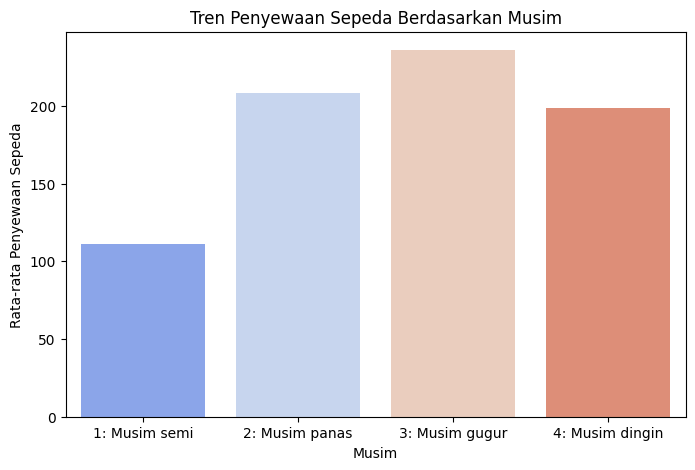

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

seasonal_trend = df_hour.groupby('season')['cnt'].mean().reset_index()
labels_mnth = ["1: Musim semi", "2: Musim panas", "3: Musim gugur", "4: Musim dingin"]

plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_trend, x=labels_mnth, y='cnt', palette='coolwarm')

plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim')

plt.show()


Dari hasil binning, diketahui bahwa musim semi memiliki jumlah paling sedikit penyewaan sepeda, sedangkan jumlah penyewaan tertinggi ada pada musim gugur.

## Conclusion

- Suhu memiliki pengaruh paling besar terhadap jumlah penyewaan sepeda, dibandingkan kelembaban dan kecepatan angin.
- Tren bulanan menunjukkan bahwa pertengahan tahun, terutama di musim panas dan gugur, adalah periode dengan jumlah penyewaan tertinggi, sementara awal dan akhir tahun, terutama musim dingin dan semi cenderung mengalami penurunan drastis. Juga terdapat peningkatan jumlah penyewaan pada tahun 2012 dibandingkan 2011.
- Tren harian menunjukkan pola jam sibuk di pagi hari, terutama pada pukul 08.00, dan sore hari, terutama pada pukul 17.00. Hal ini mengindikasikan bahwa sepeda sering digunakan sebagai alat transportasi untuk bekerja atau sekolah.